## Extension of Project 6

### Import some packages.

In [1]:
import skimage.io
import skimage.color
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


### Load character data from the dataset subfolder

In [2]:
DATASET_DIR = 'D:\Y3S2\workshop\Project6\File for students-20200430\dataset'
classes = os.listdir(DATASET_DIR)
data = []
for cls in classes:
    files = os.listdir(DATASET_DIR+"/"+cls)
    for f in files:
        img = skimage.io.imread(DATASET_DIR + "/"+cls+"/"+f)
        img = skimage.color.rgb2gray(img)
        data.append({
            'x': img,
            'y': cls
        })

random.shuffle(data)

### create train data set and test data set

In [3]:
X = [d['x'] for d in data]
y = [d['y'] for d in data]

ys = list(np.unique(y))
y = [ys.index(v) for v in y]

x_train = np.array(X[:int(len(X)*0.8)])
y_train = np.array(y[:int(len(X)*0.8)])

x_test = np.array(X[int(len(X)*0.8):])
y_test = np.array(y[int(len(X)*0.8):])

### Examming and Understand data set for trainning

In [4]:
print(x_train[0])
print(y_train)
print(len(y_train))

[[  0.   0.   1.   0.   0.   2.   0.   0.  15.  66. 209.  61.  64.  13.
    3.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   5.   2.   0.   3. 145. 207. 255. 252. 255. 255. 208.
    0.   0.   0.   0.   0.   0.]
 [  0.   3.   0.   0.   0.   1.  15. 206. 255. 209. 193. 234. 255. 255.
   46.   2.   0.   0.   0.   0.]
 [  4.   0.   1.   1.   0.   0.  67. 254. 207.  17.   0.  54. 255. 253.
  190.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0. 255. 253. 145.   0.   1.   0.  49. 190.
  145.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   1.   0. 255. 255.   0.   0.   2.   0.   0.   0.
    0.   1.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   3.   0. 252. 255.   2.   0.   0.   3.   0.   0.
    5.   0.   0.   0.   0.   0.]
 [  1.   0.   3.   0.   0.   1. 255. 255.   0.   0.   2.   0.  49.  47.
    0.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   1.   0. 253. 255.   2.  45. 255. 253. 255. 255.
  205.  17.   0.   0.   0.   0.]
 [  0.   2.   0.   0.   0.   2. 255. 255.   0. 193. 255

### Decide a few parameters for trainning

In [5]:
batch_size = 128
num_classes = len(classes)
epochs =  10

## input image dimensions
img_rows, img_cols = 20, 20

### Data normalization

In [6]:
def extend_channel(data):
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    return data

x_train = extend_channel(x_train)
x_test = extend_channel(x_test)

input_shape = x_train.shape[1:]

In [7]:
#keras.utils.to_categorical()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (12920, 20, 20, 1)
12920 train samples
3231 test samples


## Create a VGG-16model

In [8]:
model = Sequential()
    
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))    
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(65,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Compile the model

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       49280     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 256)        

### Train the model

In [10]:
history = model.fit(x_train, y_train2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test2))

Instructions for updating:
Use tf.cast instead.
Train on 12920 samples, validate on 3231 samples
Epoch 1/10
12920/12920 [==============================] - 347s 27ms/step - loss: 3.8131 - accuracy: 0.0712 - val_loss: 3.6585 - val_accuracy: 0.0690
Epoch 2/10
12920/12920 [==============================] - 325s 25ms/step - loss: 3.2564 - accuracy: 0.1521 - val_loss: 2.0316 - val_accuracy: 0.3649
Epoch 3/10
12920/12920 [==============================] - 313s 24ms/step - loss: 1.7369 - accuracy: 0.5011 - val_loss: 1.0426 - val_accuracy: 0.7007
Epoch 4/10
12920/12920 [==============================] - 312s 24ms/step - loss: 0.7849 - accuracy: 0.7819 - val_loss: 0.4267 - val_accuracy: 0.8731
Epoch 5/10
12920/12920 [==============================] - 311s 24ms/step - loss: 0.4017 - accuracy: 0.8908 - val_loss: 0.2477 - val_accuracy: 0.9347
Epoch 6/10
12920/12920 [==============================] - 309s 24ms/step - loss: 0.2635 - accuracy: 0.9298 - val_loss: 0.2071 - val_accuracy: 0.9455
Epoch 7/1

### Visualize training results

In [11]:
epochs_range = range(epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

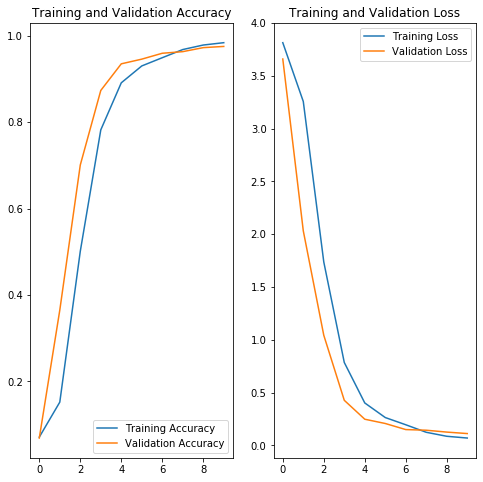

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Evaluation

In [13]:
score = model.evaluate(x_test, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11179707964631624
Test accuracy: 0.9749303460121155


In [14]:
model.save_weights('char_cnn_my.h5')